## Statistical Inference on Categorical Data
In this Notebook, we will work on more statisical inference, focusing primarily on categorical data. The first two parts of this Notebook is mostly adopted from the [Inferential Statistics](https://www.coursera.org/learn/inferential-statistics-intro/home/welcome) course of Duke University, converted from R to Python and tweaked to match the needs of our CSMODEL course.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email me at arren.antioquia@dlsu.edu.ph.

## Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2_contingency

## Atheism Survey

In August of 2012, news outlets ranging from the [Washington Post](http://www.washingtonpost.com/national/on-faith/poll-shows-atheism-on-the-rise-in-the-us/2012/08/13/90020fd6-e57d-11e1-9739-eef99c5fb285_story.html) to the [Huffington Post](http://www.huffingtonpost.com/2012/08/14/atheism-rise-religiosity-decline-in-america_n_1777031.html) ran a story about the rise of atheism in America. The source for the story was a poll that asked people, "Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?" This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. In this lab we take a look at the atheism survey and explore what's at play when making inference about population proportions using categorical data.

Let us load the data:

The press release for the poll, conducted by WIN-Gallup International, can be accessed [here](https://www.scribd.com/document/136318147/Win-gallup-International-Global-Index-of-Religiosity-and-Atheism-2012).

**Question #1:** How many people were interviewed for this survey?
- According to the article, 51,927 people were polled globally from 57 countries.

**Question #2:** What interview methods are used for the survey?
- Inverviews were done face-to-face, via telephone, or online.

Turn your attention to Table 6 in the press release (pages 15 and 16), which reports the sample size and response percentages for all 57 countries. While this is a useful format to summarize the data, we will base our analysis on the original data set of individual responses to the survey. Let us load that dataset:

In [2]:
atheism_df = pd.read_csv("atheism.csv")
atheism_df.head()

,nationality,response,year
0,Afghanistan,non-atheist,2012
1,Afghanistan,non-atheist,2012
2,Afghanistan,non-atheist,2012
3,Afghanistan,non-atheist,2012
4,Afghanistan,non-atheist,2012


**Question #3:** What does each observation in the dataset represent?
- One observation represents one answer to the poll

To investigate the link between these two ways of organizing this data, take a look at the estimated proportion of atheists in the United States. Towards the bottom of Table 6, we see that this is 5%. We should be able to come to the same number using the `atheism` data.

Let us create a new data frame containing only the rows in `atheism` associated with respondents to the 2012 survey from the United States.

In [4]:
us12 = atheism_df[(atheism_df["year"] == 2012) &
                             (atheism_df["nationality"] == "United States")]

us12

,nationality,response,year
49925,United States,non-atheist,2012
49926,United States,non-atheist,2012
49927,United States,non-atheist,2012
49928,United States,non-atheist,2012
49929,United States,non-atheist,2012
...,...,...,...
50922,United States,non-atheist,2012
50923,United States,non-atheist,2012
50924,United States,non-atheist,2012
50925,United States,non-atheist,2012


Next, calculate the proportion of atheist responses in the United States in 2012, i.e. in `us12`. Print the proportion. Limit to 2 decimal places.

In [10]:
def print_2d(n):
    return '{:.2f}'.format(n)

In [12]:
# Write your code here
p_us12_atheist = len(us12[us12["response"]=="atheist"]) / len(us12)
print_2d(p_us12_atheist)


'0.05'

**Question #4:** What is the proportion of atheist in the United States in 2012 to the total number of responses from the United States in 2012?
- 5%

**Question #5:** How does the proportion compare with the proportion presented in Table 6?
- They are equal.

### Inference on Survey Data

The statistics we compute from our dataset are **sample statistics**. What we'd like, though, is insight into the population **population parameters**. You answer the question, "What proportion of people in your sample reported being atheists?" with a statistic; while the question "What proportion of people on earth would report being atheists" is answered with an estimate of the parameter.

The inferential tools for estimating population proportion are analogous to those used for means in the previous Notebook: the confidence interval and the hypothesis test.

**Question #6:** What are the conditions for inference to construct a 95% confidence interval for the proportion of atheists in the United States in 2012. 

- Observations are independent
- Sample size is sufficiently large (np >= 10 and n(1-p) >= 10 

**Question #7:** Are you confident that all conditions are met? Explain.
- Yes. Observations are independent due to random sampling. Sample size is sufficiently large due to number of observations.

Construct a 95% confidence interval for the proportion of atheists in United States in 2012. Report the result as:

$$proportion \pm margin of error\%$$

Compute and print the margin of error. Limit to 2 decimal places.

In [15]:
# Write your code here
z_star_95 = norm.ppf(.975)
ste_us12_atheist = np.sqrt(p_us12_atheist * (1 - p_us12_atheist)/ len(us12))

me_us12_atheist = ste_us12_atheist * z_star_95

print(print_2d(me_us12_atheist))

0.01


**Question #8:** Given a 95% confidence level, what is the margin of error?
- 0.01

Compute and print the confidence interval (minimum value, maximum value). Limit to 2 decimal places.

In [18]:
# Write your code here
print(print_2d(p_us12_atheist - me_us12_atheist), print_2d(p_us12_atheist + me_us12_atheist))

0.04 0.06


**Question #9:** Specify the confidence interval (minimum value, maximum value) as a range. Limit to 2 decimal places.
- \[0.04, 0.06\]

Although formal confidence intervals and hypothesis tests don't show up in the report, suggestions of inference appear at the bottom of page 7: "In general, the error margin for surveys of this kind is $\pm$ 3-5% at 95% confidence."

## How Does the Proportion Affect the Margin of Error?

Imagine you've set out to survey 1000 people on two questions: are you female? and are you left-handed? Since both of these sample proportions were calculated from the same sample size, they should have the same margin of error, right? Wrong!  While the margin of error does change with sample size, it is also affected by the proportion.

Think back to the formula for the standard error: $SE = \sqrt{p(1-p)/n}$. This is then used in the formula for the margin of error for a 95% confidence interval: $ME = 1.96\times SE = 1.96\times\sqrt{p(1-p)/n}$. Since the population proportion $p$ is in this $ME$ formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of $ME$ vs. $p$.

The first step is to make a vector `p` that is a sequence from $0$ to $1$ with each number separated by $0.01$. We can then create a vector of the margin of error (`me`) associated with each of these values of `p` using the familiar approximate formula ($ME = 1.96 \times SE$).

In [19]:
d = pd.DataFrame(np.arange(0.0, 1.01, 0.01), columns = ['p'])
n = 1000
d["ME"] = 1.96 * np.sqrt(d["p"] * (1 - d["p"]) / n)
d

,p,ME
0,0.00,0.000000
1,0.01,0.006167
2,0.02,0.008677
3,0.03,0.010573
4,0.04,0.012146
...,...,...
96,0.96,0.012146
97,0.97,0.010573
98,0.98,0.008677
99,0.99,0.006167


Then, we plot the relationship.

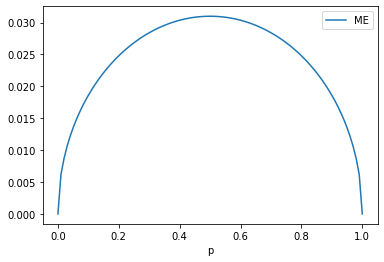

In [20]:
d.plot(x = "p", y = "ME")
plt.show()

**Question #10:** Describe the relationship between the sample probability and the margin of error. Why do you think this is the case?
- It forms a parabola. This is because of the nature of the equation $p(1-p)$ or $p - p^2$ (quadratic polynomial) in computing the margin of error. A quadratic polynomial forms a parabola when graphed.

## Behavioral Survey Data

Next, we will look at behaviorial survey data. The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States collected by the Centers for Disease Control and Prevention (CDC). As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The [BRFSS Web site](https://www.openintro.org/redirect.php?go=cdc_data_brfss&referrer=data_set_page) contains a complete description of the survey, the questions that were asked and even research results that have been derived from the data.

This data set is a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 questions or variables in this dataset, the one will we will use in this Notebok only includes 3 variables.

In [21]:
cdc_df = pd.read_csv("cdcpartial.csv")
cdc_df.head()

,genhlth,smoke100,exerany
0,good,0,0
1,good,1,0
2,good,1,1
3,good,0,1
4,very good,0,0


The variables in this Notebook are as follows:

- **genhlth.** A categorical vector indicating general health, with categories excellent, very good, good, fair, and poor.
- **smoke100.** A categorical vector, 1 if the respondent has smoked at least 100 cigarettes in their entire life and 0 otherwise.
- **exerany.** A categorical vector, 1 if the respondent exercised in the past month and 0 otherwise.

### Inference Using Chi-Square

Let's try to compare the general health of people who have exercised in the past month against people who have not exercised in the past month.

First, we count the number of people in each group for each general health level.

In [22]:
counts = cdc_df.groupby("exerany")["genhlth"].value_counts()
counts

exerany  genhlth  
0        good         1731
         very good    1352
         fair          857
         excellent     762
         poor          384
1        very good    5620
         good         3944
         excellent    3895
         fair         1162
         poor          293
Name: genhlth, dtype: int64

At first glance, it appears that people who have exercised in the past month has better general health. But we do not know if this difference is statistically significant, or just a result of a sampling error.

We will use a Chi-square test to determine whether there is a difference between the two groups, in terms of the distribution of their responses.

First, we need to convert our counts into a table format. We will create a new DataFrame for this.

In [23]:
table = pd.DataFrame([counts[0], counts[1]], index=["no exercise", "exercise"]).transpose()
table

,no exercise,exercise
good,1731,3944
very good,1352,5620
fair,857,1162
excellent,762,3895
poor,384,293


We then use the `chi2_contingency` function from SciPy to perform a Chi-Square test on this table. This function will automatically perform the necessary steps for a Chi-Square test:

- Compute the expected values for each cell under the null hypothesis
- Compute the Chi-Square statistic
- Compute the $p$-value of the statistic based on the Chi-Square distribution with the appropriate degrees of freedom

In [24]:
chi2_contingency(table)

(1070.8127561645524,
 1.6049383557705677e-230,
 4,
 array([[1443.1525, 4231.8475],
        [1772.9796, 5199.0204],
        [ 513.4317, 1505.5683],
        [1184.2751, 3472.7249],
        [ 172.1611,  504.8389]]))

**Question #11:** What is the $p$-value? Limit to 2 decimal places.
- $1.60e^{-230}$
- _**Strictly** limiting to 2 decimal places: _ 0.00

**Question #12:** What can we conclude from the $p$-value? State your conclusion.
- The two columns (no exercise and exercise) has statistically significant difference and therefor we can conclude that exercising may affect one's general health

### Try it Yourself

**Practice!** Compare the general health of people who have smoked at least 100 cigarettes in their entire life against people who have not smoked at least 100 cigarettes in their entire life.

First, we count the number of people in each group for each general health level.

In [26]:
# Write your code here
smoke_counts = cdc_df.groupby("smoke100")["genhlth"].value_counts()
smoke_counts

smoke100  genhlth  
0         very good    3758
          excellent    2879
          good         2782
          fair          911
          poor          229
1         very good    3214
          good         2893
          excellent    1778
          fair         1108
          poor          448
Name: genhlth, dtype: int64

Convert our counts into a table format.

In [27]:
# Write your code here
smoke_table = pd.DataFrame([smoke_counts[0], smoke_counts[1]], index=["no smoke", "smoked"]).transpose()

smoke_table

,no smoke,smoked
very good,3758,3214
excellent,2879,1778
good,2782,2893
fair,911,1108
poor,229,448


**Question #13:** How many smoked at least 100 cigarettes in their entire life but have an excellent general health level?
- 1778

Compute the $p$-value.

In [28]:
# Write your code here
chi2_contingency(smoke_table)

(333.5253231905418,
 6.318174106818791e-71,
 4,
 array([[3680.8674 , 3291.1326 ],
        [2458.66315, 2198.33685],
        [2996.11625, 2678.88375],
        [1065.93105,  953.06895],
        [ 357.42215,  319.57785]]))

**Question #14:** What is the $p$-value? Limit to 2 decimal places.
- $6.32e^{-71}$
- _**Strictly** limiting to 2 decimal places: _ 0.00

**Question #15:** What can we conclude from the $p$-value? State your conclusion.

- Similar to the chi square test results of the previous example, it's $p$-value has a very small value of $6.32e^{-71})$
- We can also then conclude that the two columns are statistically significantly different; and thus, we can come to a conclusion that having smoked at least 100 cigarettes in a lifetime may affect your general health
